## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [8]:
df = pd.read_csv("G:\Residency 3\LAB_ Assignment\External Lab\students-data.csv", delimiter = ';')
#df = pd.read_csv("G:\Residency 3\LAB_ Assignment\External Lab\students-data.csv")

In [199]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [200]:
df.shape

(395, 33)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [9]:
# creating a copy of dataframe for making changes.
df_new = df

In [10]:
#Converting object to category

df_new['school']= df_new['school'].astype('category')
df_new['sex']= df_new['school'].astype('category')
df_new['address']= df_new['address'].astype('category')
df_new['famsize']= df_new['famsize'].astype('category')
df_new['Pstatus']= df_new['Pstatus'].astype('category')
df_new['Mjob']= df_new['Mjob'].astype('category')
df_new['Fjob']= df_new['Fjob'].astype('category')
df_new['reason']= df_new['reason'].astype('category')
df_new['guardian']= df_new['guardian'].astype('category')
df_new['schoolsup']= df_new['schoolsup'].astype('category')
df_new['famsup']= df_new['famsup'].astype('category')
df_new['paid']= df_new['paid'].astype('category')
df_new['activities']= df_new['activities'].astype('category')
df_new['nursery']= df_new['nursery'].astype('category')
df_new['higher']= df_new['higher'].astype('category')
df_new['internet']= df_new['internet'].astype('category')
df_new['romantic']= df_new['romantic'].astype('category')

In [11]:
#Converting the age datatype from object to int.
df_new['age']= df_new['age'].astype('int')

In [205]:
#Check
#df_new.info()

In [206]:
# Look for any missing value in the dataframe.
df_new.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

There is no missing values in the dataframe.

In [12]:
df_new['number']= df_new.index

In [13]:
df_new.set_index('number',inplace= True)

In [209]:
#check
#df_new.head(2)

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [14]:
y = df_new.select_dtypes(include = 'category').columns
y

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [15]:
x =df_new.var()

In [16]:
x[x<1]

traveltime    0.486513
studytime     0.704324
failures      0.553017
famrel        0.803997
freetime      0.997725
Dalc          0.793420
dtype: float64

In [17]:
df_new.drop(['traveltime','studytime','failures','famrel','freetime','Dalc'],axis = 1,inplace = True)

In [18]:
#Check new shape
df_new.shape

(395, 27)

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [19]:
# instantiate labelencoder object
le = LabelEncoder()

In [20]:
le.fit_transform(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'])


array([14, 16,  4,  5,  2,  1,  0, 12,  7, 15,  6, 11,  3, 10,  8,  9, 13],
      dtype=int64)

In [21]:
# apply le on categorical feature columns
df_new[y] = df_new[y].apply(lambda col: le.fit_transform(col))

In [22]:
df_new.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10
5,0,0,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,15,15,15
6,0,0,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,6,5,6
8,0,0,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,16,18,19


In [219]:
#check
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int32
sex           395 non-null int32
age           395 non-null int32
address       395 non-null int32
famsize       395 non-null int32
Pstatus       395 non-null int32
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int32
Fjob          395 non-null int32
reason        395 non-null int32
guardian      395 non-null int32
schoolsup     395 non-null int32
famsup        395 non-null int32
paid          395 non-null int32
activities    395 non-null int32
nursery       395 non-null int32
higher        395 non-null int32
internet      395 non-null int32
romantic      395 non-null int32
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 non-null int64
dtyp

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [23]:
# Coverting G1 into binary 

df_new['G1'].replace(to_replace = [10,11,12,13,14,15,16,17,18,19],value = 1,inplace = True)
df_new['G1'].replace(to_replace = [3,4,5,6,7,8,9],value = 0,inplace = True)

df_new['G1'].value_counts()

1    253
0    142
Name: G1, dtype: int64

In [24]:
df_new['school'].value_counts()

# School GP = 349
#School MS = 46 records.

0    349
1     46
Name: school, dtype: int64

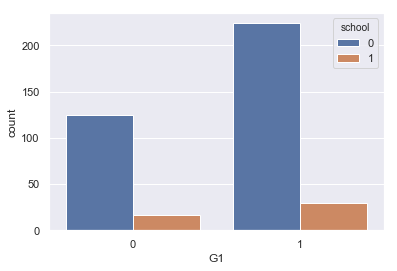

In [222]:
sns.set(style="darkgrid")
sns.countplot(df_new['G1'],hue=df_new['school'])

In [223]:
# Coverting G2 into binary

df_new['G2'].replace(to_replace = [10,11,12,13,14,15,16,17,18,19],value = 1,inplace = True)
df_new['G2'].replace(to_replace = [4,5,6,7,8,9],value = 0,inplace = True)

df_new['G2'].value_counts()

1    249
0    146
Name: G2, dtype: int64

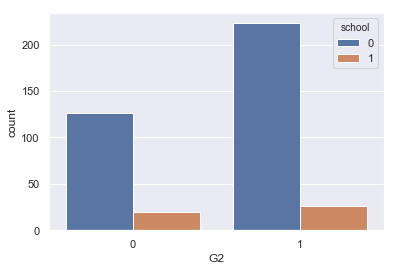

In [224]:
sns.set(style="darkgrid")
sns.countplot(df_new['G2'],hue=df_new['school'])

In [25]:
# Coverting G3 into binary

df_new['G3'].replace(to_replace = [10,11,12,13,14,15,16,17,18,19,20],value = 1,inplace = True)
df_new['G3'].replace(to_replace = [4,5,6,7,8,9],value = 0,inplace = True)

df_new['G3'].value_counts()

1    265
0    130
Name: G3, dtype: int64

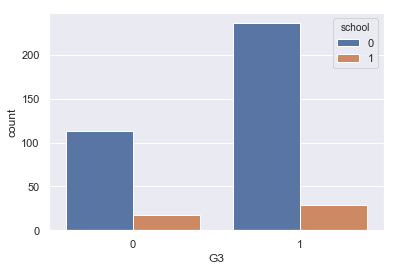

In [26]:
sns.set(style="darkgrid")
sns.countplot(df_new['G3'],hue=df_new['school'])

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [27]:
array = df_new.values
X = df_new.iloc[:,0:26]
y = df_new.iloc[:,26]

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [228]:
df_new.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
school,1.000000,1.000000,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,...,-0.024150,-0.133578,0.060700,-0.007152,0.065087,-0.042651,-0.088480,-0.007620,-0.049010,-0.031254
sex,1.000000,1.000000,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,...,-0.024150,-0.133578,0.060700,-0.007152,0.065087,-0.042651,-0.088480,-0.007620,-0.049010,-0.031254
age,0.377610,0.377610,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,...,-0.209081,-0.112094,0.164669,0.126964,0.117276,-0.062187,0.175230,-0.062674,-0.157843,-0.179645
address,-0.279797,-0.279797,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,...,0.042854,0.216842,0.005257,0.068835,-0.101126,-0.040355,-0.027874,0.055338,0.094195,0.052282
famsize,0.064866,0.064866,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,...,-0.005806,0.000720,0.034395,0.023064,0.103425,-0.028992,0.035783,0.034724,0.071031,0.041842
Pstatus,0.045923,0.045923,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,...,-0.040735,0.070074,-0.040451,0.003459,0.006045,0.022307,-0.134937,-0.012787,-0.019852,-0.044050
Medu,-0.133333,-0.133333,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,...,0.168845,0.201463,0.039681,0.064094,-0.047123,-0.046878,0.100285,0.204648,0.169848,0.115396
Fedu,-0.079807,-0.079807,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,...,0.174566,0.127507,0.015602,0.043105,-0.012631,0.014742,0.024473,0.209010,0.193714,0.108057
Mjob,-0.056670,-0.056670,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,...,0.097887,0.216969,-0.062999,0.003169,-0.012051,0.065220,0.050254,0.073532,0.037497,0.026592
Fjob,0.018974,0.018974,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,...,-0.045250,0.035777,-0.000583,0.010340,0.070024,-0.018058,0.008196,0.036116,0.006251,0.028309


Text(0.5, 1.0, 'Correlation Heatmap')

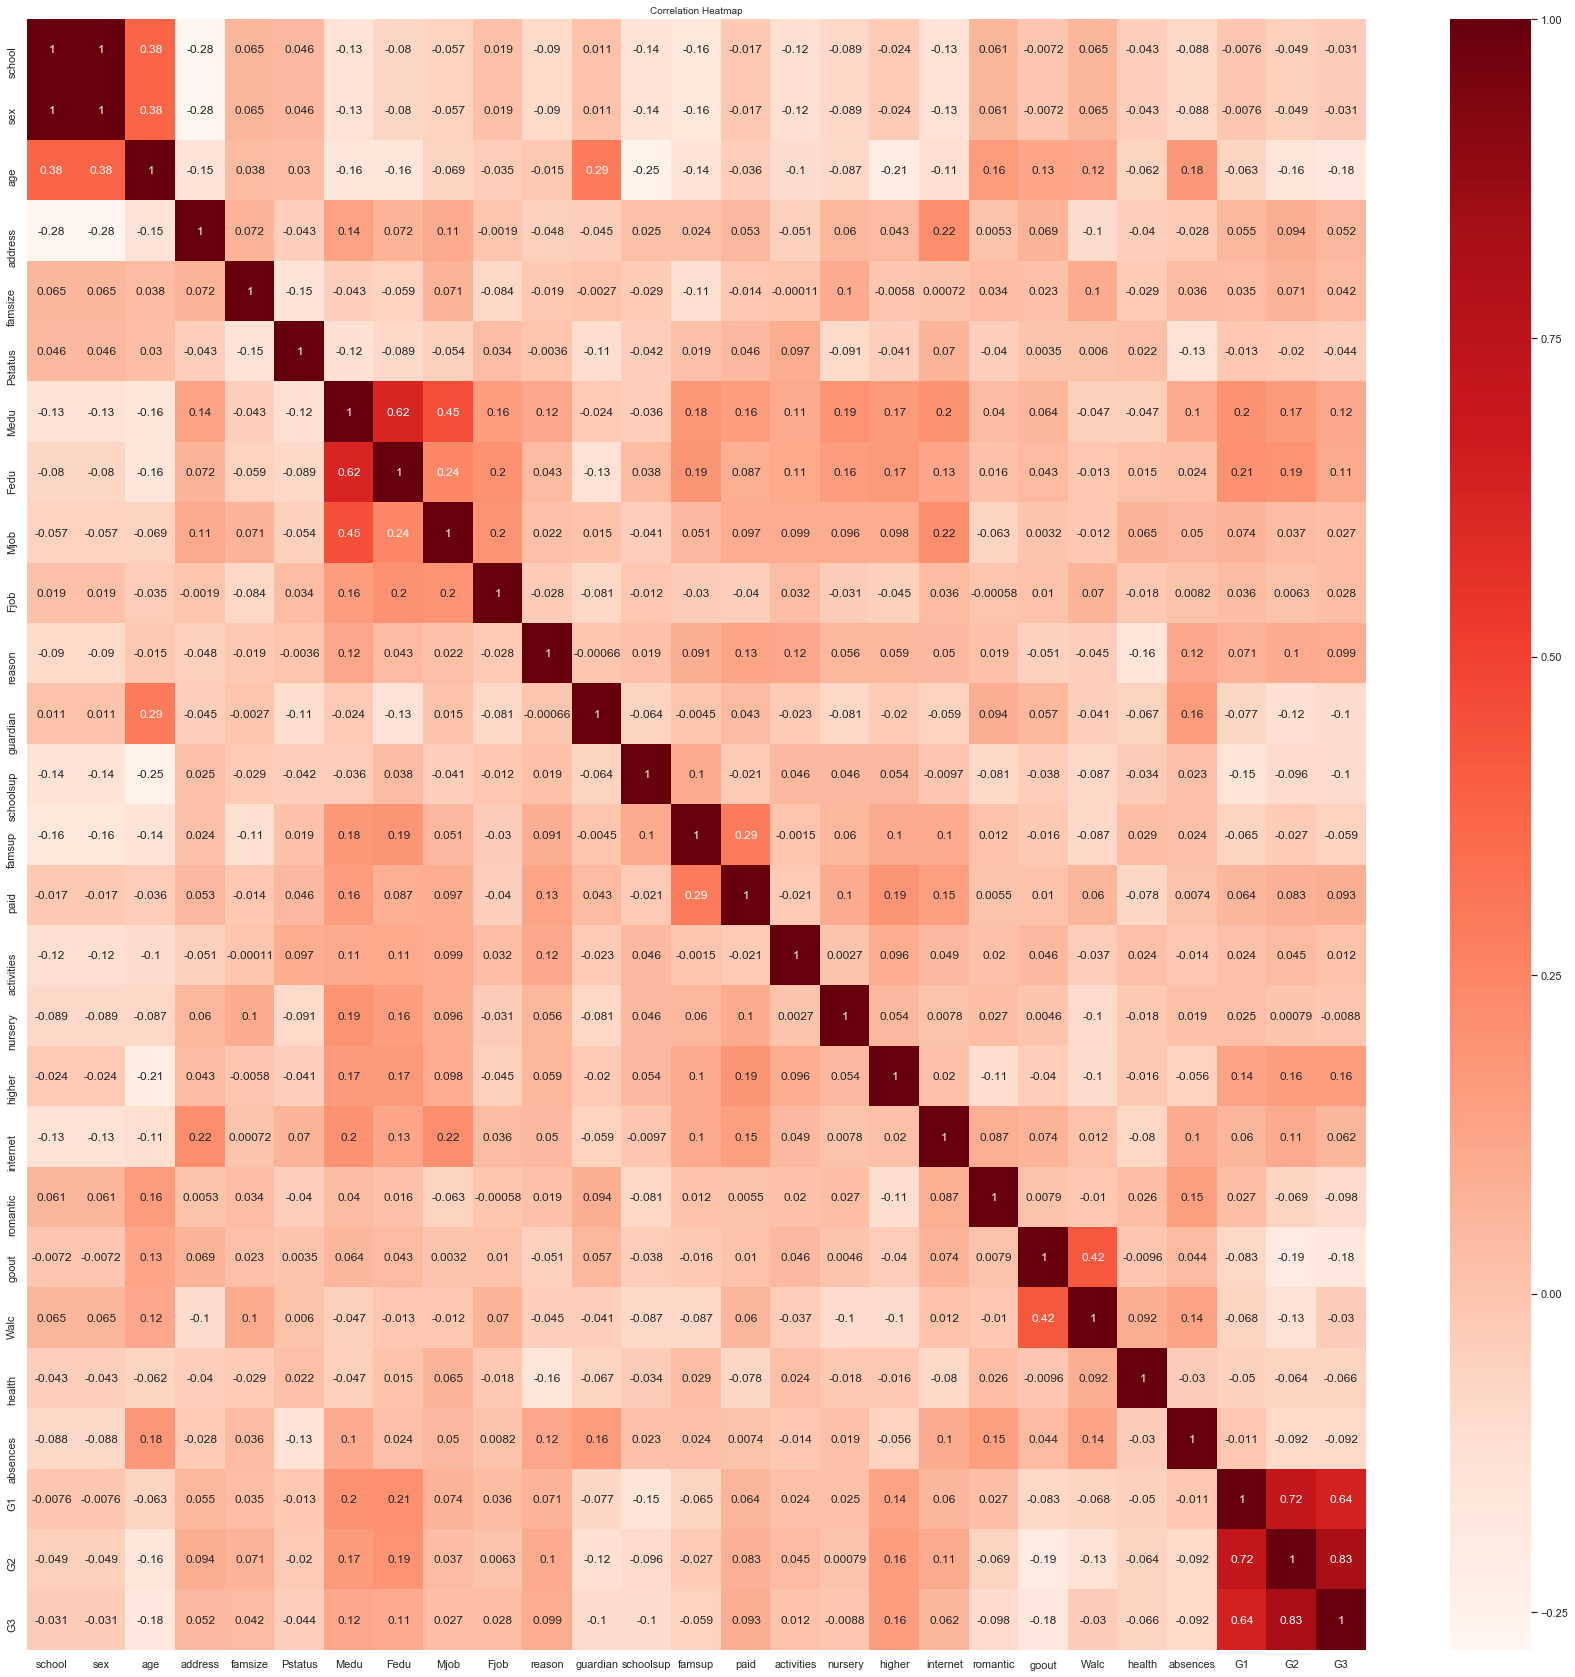

In [229]:
#see correlation between variables through a correlation heatmap
corr = df_new.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=10)


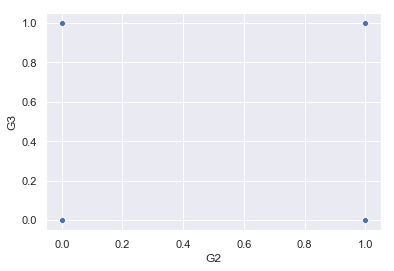

In [230]:
sns.scatterplot(df_new["G2"],df_new["G3"])

In [231]:
#pd.crosstab(index=df.final_grade, columns=df.romantic)
pd.crosstab(index = df_new.G3,columns = df_new.G2)

G2,0,1
G3,,
0,122,8
1,24,241


The correlation coefficient between G2 & G3 is 0.83.  G3 has a strong correlation with G2. It is a good attribute for G3 prediction.


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [232]:
df_new['school'].value_counts()

0    349
1     46
Name: school, dtype: int64

More records are present for the "GP" school.There is baise in the data.Hence , better prediction can be done for GP school.

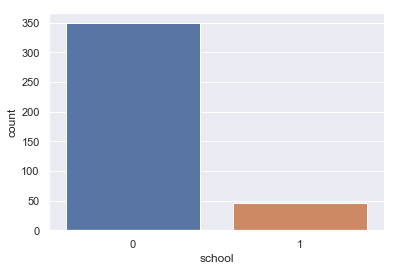

In [233]:
# Plotting the number of students in each school 
sns.countplot(df['school'])

In [234]:
# Plot for number of students with different ages
df['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

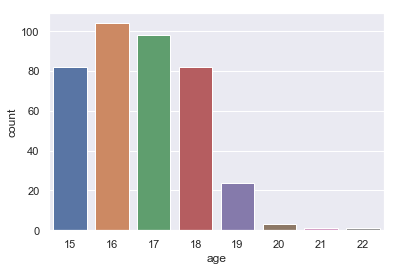

In [235]:
sns.countplot(df_new['age'])

Again here less data is present for the age greater than 18.

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [28]:
test_size = 0.25
seed = 2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state=seed)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [29]:
#fit the model on 25%
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)
y_predict = model_LR.predict(X_test)

C:\Users\Paridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [243]:
t = list(X_train.columns)

In [245]:
coef_df = pd.DataFrame(model_LR.coef_,columns = t)
coef_df['Intercept'] = model_LR.intercept_
print(coef_df)

     school       sex       age   address   famsize   Pstatus      Medu  \
0  0.045622  0.045622 -0.169508  0.090101  0.201961 -0.381195  0.206824   

      Fedu      Mjob      Fjob  ...   higher  internet  romantic     goout  \
0 -0.41894 -0.121854  0.284846  ...  1.10901  0.122805 -0.633308 -0.182706   

      Walc    health  absences        G1        G2  Intercept  
0  0.28865 -0.038529  -0.02634  1.328036  3.870194   0.498368  

[1 rows x 27 columns]


In [30]:
#check accuracy for training set
a = model_LR.predict(X_train)
metrics.accuracy_score(a, y_train)

0.9358108108108109

In [31]:
#check accuracy for test set
metrics.accuracy_score(y_test, y_predict)

0.9191919191919192

In [59]:
#metrics.precision_score(y_test, y_predict)
#metrics.f1_score(y_test, y_predict)
#metrics.recall_score(y_test, y_predict)

In [249]:
print ('\n clasification report:\n', metrics.classification_report(y_test, y_predict))


 clasification report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        31
           1       0.95      0.91      0.93        68

   micro avg       0.91      0.91      0.91        99
   macro avg       0.89      0.91      0.90        99
weighted avg       0.91      0.91      0.91        99



# Naive bayes with Iris data

### Import Iris.csv

In [150]:
df1= pd.read_csv("G:\Residency 3\LAB_ Assignment\External Lab\Iris.csv")

In [151]:
df_Iris = df1

In [152]:
df_Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [153]:
# Performing label encoder on the "Class"
df_Iris['Class']= le.fit_transform(df_Iris['Class'])

#check
df_Iris['Class']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int32

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [154]:
array = df_Iris
X = array.iloc[:,0:4]
y = array.iloc[:,4]

### Find the distribution of target variable (Class)

In [155]:
df_Iris['Class'].value_counts()

2    50
1    50
0    50
Name: Class, dtype: int64

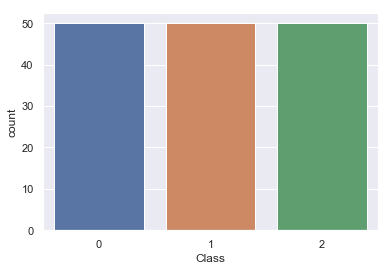

In [156]:
sns.countplot('Class',data = df_Iris)
#pd.value_counts(df_Iris["Class"]).plot(kind="bar")

### Plot the distribution of target variable using histogram

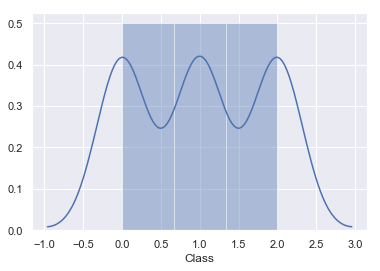

In [157]:
sns.distplot(df_Iris["Class"])

The "Class" has equally distributed types of classes in it.

In [158]:
#sns.distplot(df_Iris['Class'],bins=20,kde=False)

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

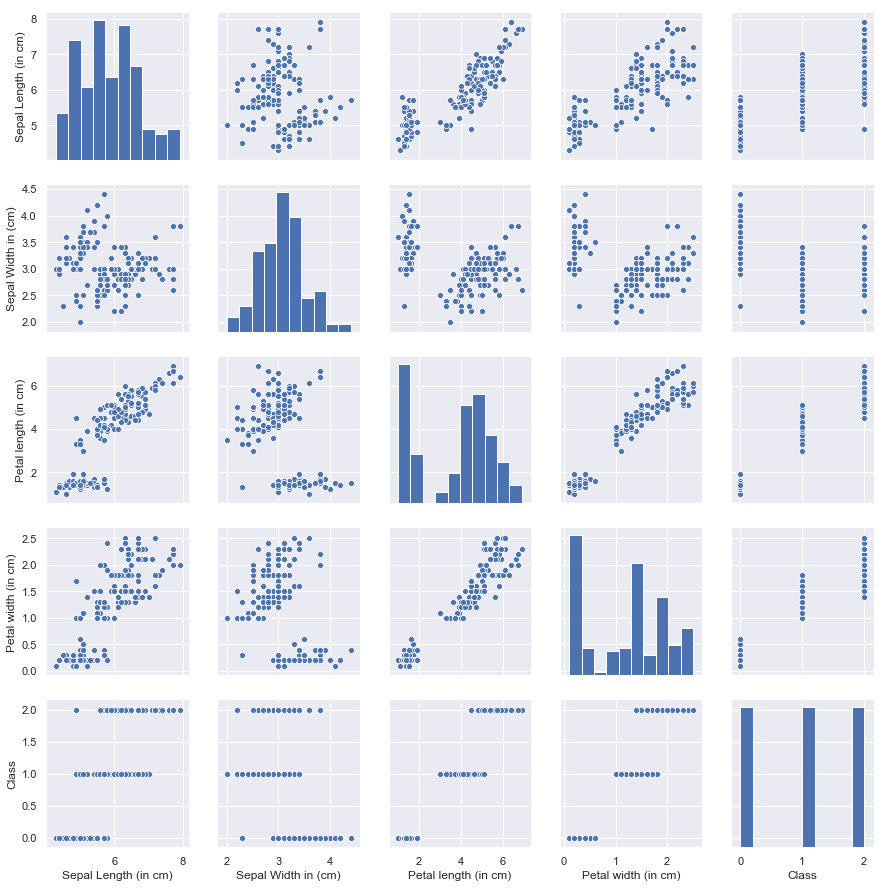

In [159]:
sns.pairplot(df_Iris)

Petal width and Petal length are having linear relationship.One among them can be dropped.

### Summary Statistics and explain insights for at least 2 variables

In [160]:
df_Iris.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


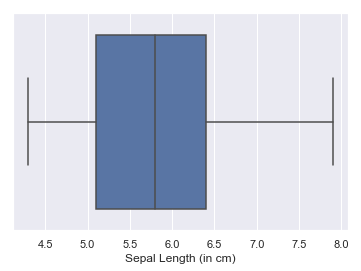

In [161]:
#df_Iris.info()
sns.boxplot(x =df_Iris['Sepal Length (in cm)'] )

No outliers.This is approximately normally distributed, very sligtly right skewed.

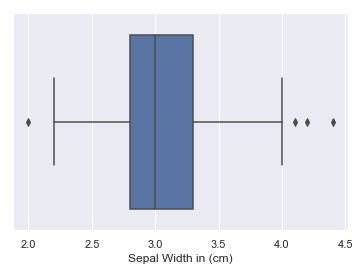

In [162]:
sns.boxplot(x =df_Iris['Sepal Width in (cm)'] )

This attribute is slightly right skewed with some outlier. Still the distribution is in good shape.

### Correlation among all variables and give your insights

In [163]:
df_Iris.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


Petal length and Petal width are very good predictors for class and Sepal Length is also a good predictor for target.While Sepal width is not that good predictor for Class.

Pedal width and Petal length are very strongly correlated. One can be dropped out of these.

### Split data in Training and Validation in 80:20

In [164]:
array = df_Iris
X = array.iloc[:,0:4]
y = array.iloc[:,4]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 1)

### Do Feature Scaling

In [168]:
#Normalization rescaling real valued numeric attributes into the range 0 and 1.
#from sklearn import preprocessing
# normalize the data attributes
#X_train = preprocessing.normalize(X_train)
#X_test = preprocessing.normalize(X_test)

# standarize the data attributes
#X_train = preprocessing.scale(X_train)
#X_test = preprocessing.scale(X_test)


#Dropping coloumn "Sepal Width".

df_Iris.drop(labels= 'Sepal Width in (cm)',axis=1,inplace = True)

I tried standarization and normalization though these are not increasing the accuracy of the model.As,I think data is already in 
a good shape.

I dropped "Sepal Widht" as it is in high correlation with the Sepal Length. Both are giving same kind of input to the model.
Hence,drooping it has no effect on the model accuracy.

### Train and Fit NaiveBayes Model

In [174]:
model = GaussianNB()
model.fit(X_train,y_train)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


### Print Accuracy and Confusion Matrix and Conclude your findings

In [175]:
#make prediction
expected = y_test
predicted = model.predict(X_test)

In [191]:
# checking for training set
a=model.predict(X_train)
metrics.accuracy_score(a,y_train)

0.95

In [192]:
# CHecking for test set
metrics.accuracy_score(expected,predicted)

0.9666666666666667

In [193]:
# Summarize the fit of the model
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [178]:
print(metrics.confusion_matrix(expected,predicted))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


The model is giving high accuracy score. Meaning,model will be able to predict 96% correct class for the new data.While the sensitivity and specificity is also good at the class level.